<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Assignment_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment Data Set:

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
1. [Brief Description: ](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis)Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. [Dataset.](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
3. Python code to create dataset: [Python Code](https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html)
What can you infer about the relationships between (1) the women, and (2) the social events?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite

%matplotlib inline

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

Text(0.5, 1.0, 'Figure 1')

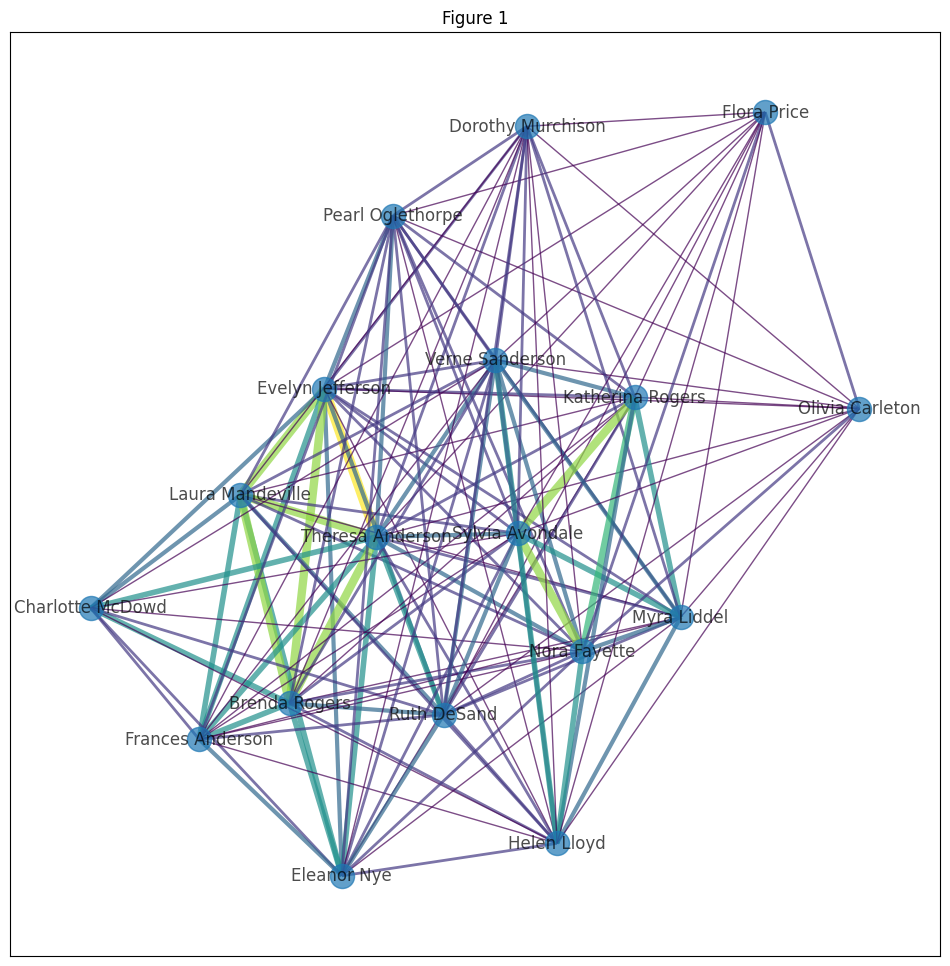

In [ ]:
w = bipartite.projected_graph(G, women)
w = bipartite.weighted_projected_graph(G, women, ratio = False)

weights = [edata['weight'] for f,t,edata in w.edges(data = True)]
plt.figure(figsize = (12,12))
nx.draw_networkx(w, width =  weights, edge_color = weights, alpha = 0.7)
plt.title('Figure 1')

In [ ]:
w_deg = nx.degree_centrality(w)

sorted_w_deg = sorted(w_deg.items(), key=lambda item: (-item[1], item[0]))
sorted_w_deg = [(k, round(v, 5)) for k, v in sorted_w_deg]

sorted_w_deg

[('Evelyn Jefferson', 1.0),
 ('Helen Lloyd', 1.0),
 ('Nora Fayette', 1.0),
 ('Ruth DeSand', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Theresa Anderson', 1.0),
 ('Verne Sanderson', 1.0),
 ('Dorothy Murchison', 0.94118),
 ('Katherina Rogers', 0.94118),
 ('Myra Liddel', 0.94118),
 ('Pearl Oglethorpe', 0.94118),
 ('Brenda Rogers', 0.88235),
 ('Eleanor Nye', 0.88235),
 ('Frances Anderson', 0.88235),
 ('Laura Mandeville', 0.88235),
 ('Flora Price', 0.70588),
 ('Olivia Carleton', 0.70588),
 ('Charlotte McDowd', 0.64706)]

In [ ]:
C = bipartite.projected_graph(G, clubs)
print("\n# Clubs")
C_degrees = {c: C.degree(c) for c in clubs}
for c in sorted(C_degrees, key=C_degrees.get, reverse=True):
    print(C_degrees[c], c)

C1 = bipartite.weighted_projected_graph(G, clubs)
print("\n# Club attendance, Clubs")
C_weights = {c: C1.degree(c, weight='weight') for c in clubs}
for c in sorted(C_weights, key=C_weights.get, reverse=True):
    print(C_weights[c], c)




# Clubs
13 E6
13 E7
13 E8
13 E9
8 E1
8 E2
8 E3
8 E4
8 E5
8 E10
8 E11
8 E12
8 E13
8 E14

# Club attendance, Clubs
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


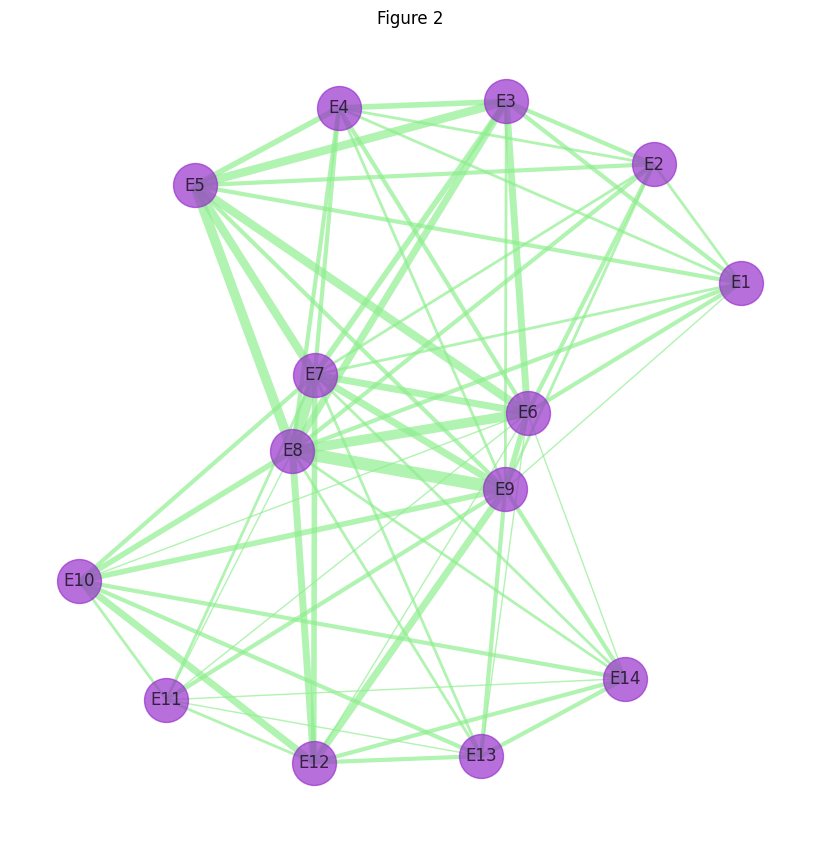

In [ ]:
weights = [edata['weight'] for f, t, edata in C1.edges(data=True)]

plt.figure(figsize=(8, 8))
pos = nx.kamada_kawai_layout(C)
nx.draw(C, pos, with_labels=True, node_size=1000, node_color="darkorchid", font_size=12,
        width=weights, edge_color="lightgreen", alpha=0.7)
plt.axis('off')
plt.title('Figure 2')
plt.show()



Text(0.5, 1.0, 'Figure 3')

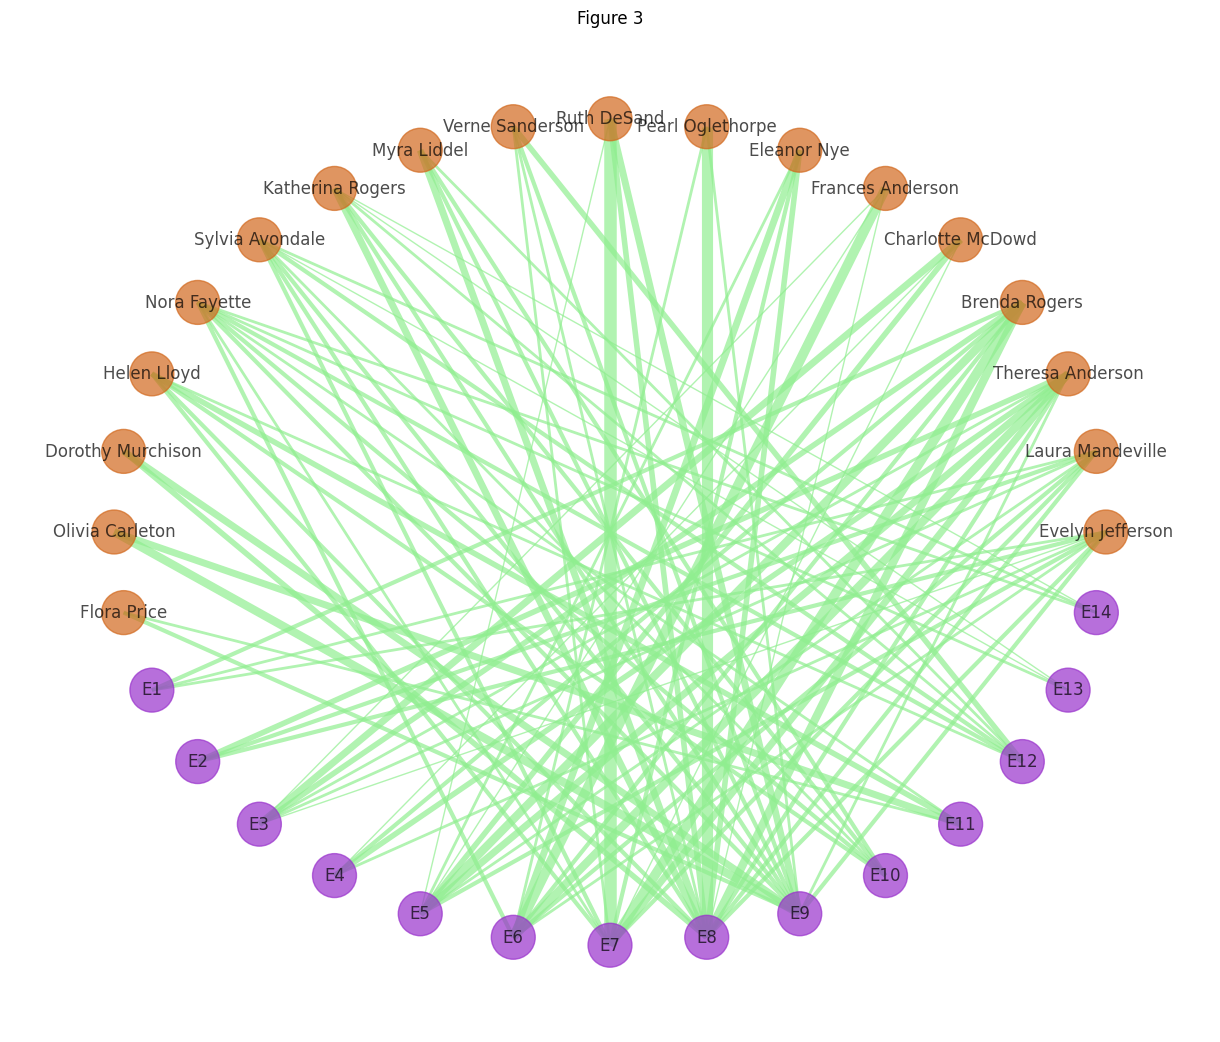

In [ ]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('darkorchid')
    else:
        colors.append('chocolate')

nx.draw_circular(G, with_labels=True, node_size=1000, node_color=colors, font_size=12,
        width=weights, edge_color="lightgreen", alpha=0.7)
plt.title('Figure 3')


#### Results:


1. Women Network:

Going through the women network we can establish that the most active member is Theresa Anderson. That being said the next members are also highly central nodes and they are:
Evelyn Jefferson, Brenda Rodgers, Sylvia Avondale, Laura Mandeville, and Nora Fayette. The 2 members that are the least engaged in club activites seem to be Flora Rice and Olivia Carlenton.
Another active cluster would consists of Nora Fayette, Sylvia Avondale, and Katherina Rogers.

2. Clubs Network:

The most popular clubs are E6, E7, E8, and E9 are the most popular among the women. The least popular clubs are E1, E13, and E14.


3. Overall Combined Analysis:

Interesting that Theresa Anderson is a member of all four influential clubs: E6, E7, E8, and E9. However the next influential members are only apart 3 out of the 4 influential clubs but not all of them.
Evelyn Jefferson attends E6, E8, and E9 clubs, but not E7.
Brenda Rodgers attends E6, E7, and E8 clubs, but not E9.
Sylvia Avondale attends E7, E8, and E9 clubs, but not E6.